In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
print(tf.__version__)

2.2.0


In [2]:
# download file zip datasets 
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-28 07:17:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.42MB/s    in 18s     

2020-07-28 07:17:23 (17.4 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# ekstrasi file zip datasets
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [5]:
# menampilkan jumlah data masing masing direktori rock, paper, dan scissors 
print("dataset untuk suit Batu =",(len(os.listdir('/tmp/rockpaperscissors/rock'))))
print("dataset untuk suit Kertas =",(len(os.listdir('/tmp/rockpaperscissors/paper'))))
print("dataset untuk suit Gunting =",(len(os.listdir('/tmp/rockpaperscissors/scissors'))))

dataset untuk suit Batu = 726
dataset untuk suit Kertas = 712
dataset untuk suit Gunting = 750


In [6]:
# membuat nama direktori dan membuat direktori baru 'train' dan 'val'
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [8]:
# memecah direktori menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [9]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [10]:
# copy data train dan val ke direktori baru 
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [11]:
# menampilkan jumlah train
print ("train batu =",(len(os.listdir('/tmp/rockpaperscissors/train/rock'))))
print ("train gunting =",(len(os.listdir('/tmp/rockpaperscissors/train/scissors'))))
print ("train kertas =",(len(os.listdir('/tmp/rockpaperscissors/train/paper'))))

train batu = 435
train gunting = 450
train kertas = 427


In [12]:
# menampilkan jumlah val 
print ("val batu =",(len(os.listdir('/tmp/rockpaperscissors/val/rock'))))
print ("val gunting =",(len(os.listdir('/tmp/rockpaperscissors/val/scissors'))))
print ("val kertas =",(len(os.listdir('/tmp/rockpaperscissors/val/paper'))))

val batu = 291
val gunting = 300
val kertas = 285


In [14]:
# membuat image generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size =32,
    class_mode = 'categorical',
    shuffle = True,
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [16]:
# membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [17]:
ACCURACY_THRESHOLD = 0.97

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('accuracy') >= ACCURACY_THRESHOLD):   
        print("\nAkurasi Telah mencapai %2.2f%% " %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

callbacks = myCallback()

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/30
25/25 - 44s - loss: 1.1324 - accuracy: 0.3700 - val_loss: 0.8965 - val_accuracy: 0.7563
Epoch 2/30
25/25 - 44s - loss: 0.9458 - accuracy: 0.5200 - val_loss: 1.1636 - val_accuracy: 0.5437
Epoch 3/30
25/25 - 44s - loss: 0.7691 - accuracy: 0.6612 - val_loss: 0.6931 - val_accuracy: 0.7312
Epoch 4/30
25/25 - 43s - loss: 0.5766 - accuracy: 0.7763 - val_loss: 0.9461 - val_accuracy: 0.6187
Epoch 5/30
25/25 - 43s - loss: 0.5114 - accuracy: 0.8200 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/30
25/25 - 43s - loss: 0.3985 - accuracy: 0.8438 - val_loss: 0.5264 - val_accuracy: 0.8125
Epoch 7/30
25/25 - 43s - loss: 0.2994 - accuracy: 0.8938 - val_loss: 0.0817 - val_accuracy: 0.9563
Epoch 8/30
25/25 - 43s - loss: 0.3195 - accuracy: 0.8913 - val_loss: 0.3485 - val_accuracy: 0.8875
Epoch 9/30
25/25 - 43s - loss: 0.2099 - accuracy: 0.9200 - val_loss: 0.2398 - val_accuracy: 0.8813
Epoch 10/30
25/25 - 43s - loss: 0.2796 - accuracy: 0.9050 - val_loss: 0.4369 - val_accuracy: 0.8250
Epoch 11/

Using TensorFlow backend.


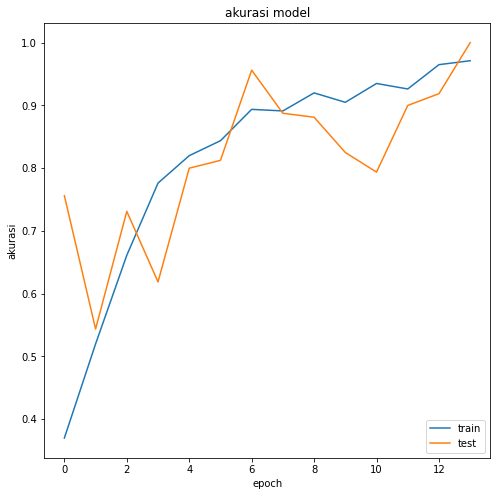

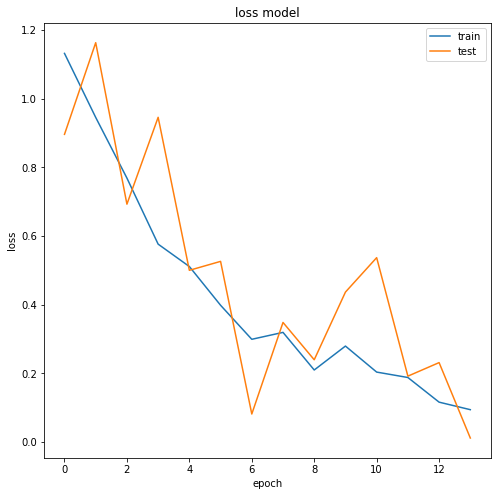

In [20]:
# visualisasi data akurasi dan loss
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

Saving batu2.jpg to batu2.jpg
batu2.jpg
Suit Batu


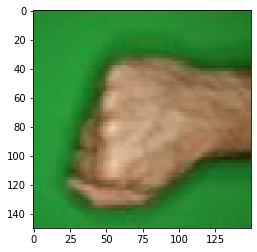

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

#Prediksi Gambar
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Suit Kertas')
  elif classes[0,1]!=0:
    print('Suit Batu')
  elif classes [0,2]!=0:
    print('Suit Gunting')
  else:
    print('Suit apa ini?')

Saving Gunting2.jpg to Gunting2.jpg
Gunting2.jpg
Suit Gunting


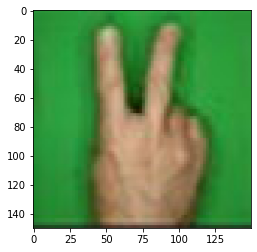

In [22]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Suit Kertas')
  elif classes[0,1]!=0:
    print('Suit Batu')
  elif classes [0,2]!=0:
    print('Suit Gunting')
  else:
    print('Suit apa ini?')

Saving Screenshot_4.jpg to Screenshot_4.jpg
Screenshot_4.jpg
Suit Kertas


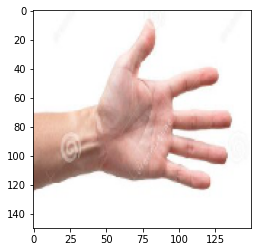

In [23]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Suit Kertas')
  elif classes[0,1]!=0:
    print('Suit Batu')
  elif classes [0,2]!=0:
    print('Suit Gunting')
  else:
    print('Suit apa ini?')